# CIFAR10 Classification Problem

🎯 **Notebook objectives**

1. Implement a CNN to solve a **`10-class classification problem`**
2. Enhance the CNN's performance with **`Data Augmentation Techniques`**
3. Experiment the **`Acceleration of GPU for Image Processing with Google Colab`**

<hr>

🎨 From [Wikipedia](https://en.wikipedia.org/wiki/CIFAR-10) (*click on the link for further information*):

> The **`CIFAR-10`** dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

🔥 In this notebook, let's implement a CNN to distinguish the 10 categories from the CIFAR-10 dataset.

## (1) Loading the CIFAR10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

labels = ['airplane', 
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

### (1.1) Working on a smaller dataset

* $50 000$ images may take a long time to train...
* 👨🏻‍🏫 **Let's start with a subsample to iterate quickly** before scaling up 🏫
* Let's divide the dataset size by `reduction_factor = 10`.

In [ ]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor))
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor))

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

------------------ Before -----------------
(50000, 32, 32, 3) (10000, 32, 32, 3)

--- After applying the reduction factor ---
(5000, 32, 32, 3) (1000, 32, 32, 3)

-------------------------------------------


{0: 485,
 1: 489,
 2: 501,
 3: 496,
 4: 485,
 5: 522,
 6: 515,
 7: 520,
 8: 482,
 9: 505}

👇 We are working with images.. so it would be a good idea to show some of them :)

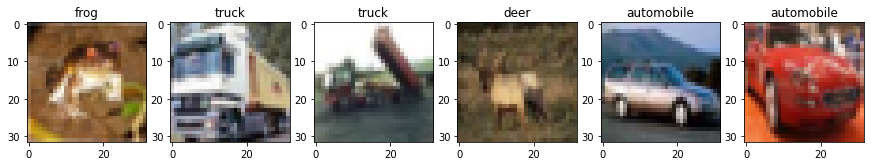

In [ ]:
# Let's plot few images to see what they look like
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

### (1.2) Image preprocesing

👉 As usual, let's:
- normalize the pixels' intensities between 0 and 1
- turn the `labels_train` and `labels_test` into "one-hot-encoded" targets that we will call respectively `y_train` and `y_cat`

In [ ]:
### Normalizing pixels' intensities

X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.

### Encoding the labels

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

## (2) Iterate on the CNN architecture using the small training set

1. Let's define the CNN architecture in an `initialize_model()` function:
2. Compile the model in a `compile_model()` method:
3. Fit our CNN only on the `small training set` and save the training information in an `history` variable
---

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(16, (4,4), strides= (1,1), input_shape=(32, 32, 3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), strides= (1,1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    
    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), strides= (1,1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32, (2,2), strides= (1,1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    
    ### Flattening
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))
        
    return model

In [ ]:
def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [ ]:
model = compile_model(initialize_model())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10, restore_best_weights = True)

history = model.fit(X_train_small, y_train_small, validation_split = 0.3,
          epochs=100,  # Use early stopping in practice
          batch_size=16,
                    callbacks = [es],
          verbose=1)

Epoch 1/100
219/219 [==============================] - 13s 8ms/step - loss: 2.1844 - accuracy: 0.1714 - val_loss: 2.1125 - val_accuracy: 0.2007
Epoch 2/100
219/219 [==============================] - 1s 6ms/step - loss: 1.9659 - accuracy: 0.2697 - val_loss: 1.9003 - val_accuracy: 0.3127
Epoch 3/100
219/219 [==============================] - 1s 6ms/step - loss: 1.8522 - accuracy: 0.3163 - val_loss: 1.7974 - val_accuracy: 0.3413
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 1.7402 - accuracy: 0.3611 - val_loss: 1.7216 - val_accuracy: 0.3607
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 1.6789 - accuracy: 0.3806 - val_loss: 1.6922 - val_accuracy: 0.3680
Epoch 6/100
219/219 [==============================] - 1s 6ms/step - loss: 1.6191 - accuracy: 0.3911 - val_loss: 1.6676 - val_accuracy: 0.3973
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 1.5689 - accuracy: 0.4226 - val_loss: 1.6334 - val_accuracy: 0.400

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdac837dfd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdac837da50>)

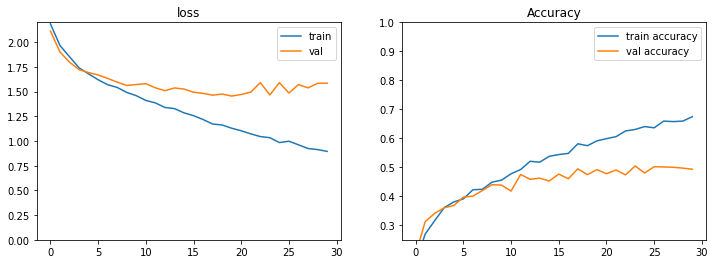

In [ ]:
plot_history(history)

Let's evaluate our model on the test data and compare it with a baseline accuracy.

In [ ]:
print(model.evaluate(X_test_small, y_test_small, verbose=1))

32/32 [==============================] - 0s 5ms/step - loss: 1.3878 - accuracy: 0.5040
[1.3878110647201538, 0.5040000081062317]


## (3) Increase the size of our training data

Let's train the model on the full dataset

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(X_train, y_train, validation_split = 0.3,
          epochs=50,  # Use early stopping in practice
          batch_size=16,
                    callbacks = [es],
          verbose=1)

Epoch 1/50
2188/2188 [==============================] - 12s 5ms/step - loss: 1.4212 - accuracy: 0.4900 - val_loss: 1.3243 - val_accuracy: 0.5283
Epoch 2/50
2188/2188 [==============================] - 12s 5ms/step - loss: 1.3250 - accuracy: 0.5243 - val_loss: 1.2609 - val_accuracy: 0.5366
Epoch 3/50
2188/2188 [==============================] - 12s 5ms/step - loss: 1.2621 - accuracy: 0.5504 - val_loss: 1.1734 - val_accuracy: 0.5809
Epoch 4/50
2188/2188 [==============================] - 11s 5ms/step - loss: 1.2168 - accuracy: 0.5653 - val_loss: 1.1935 - val_accuracy: 0.5823
Epoch 5/50
2188/2188 [==============================] - 11s 5ms/step - loss: 1.1642 - accuracy: 0.5837 - val_loss: 1.1413 - val_accuracy: 0.5941
Epoch 6/50
2188/2188 [==============================] - 12s 6ms/step - loss: 1.1368 - accuracy: 0.5948 - val_loss: 1.1209 - val_accuracy: 0.6003
Epoch 7/50
2188/2188 [==============================] - 12s 5ms/step - loss: 1.1093 - accuracy: 0.6048 - val_loss: 1.1367 - val_ac

We witnessed significant performance improvement

## (4) Data augmentation

Let's **augment the data on the fly (batch per batch)**. What does it mean ? For every epoch and every batch, during the ***.fit()*** training procedure, we will:

        1. Generate some `augmented data/images`
        2. Fit the model on the images and their augmented versions
        3. Delete the images and their augmented versions from the RAM
        4. Repeat steps 1-2-3
        
* 📚 <a href= "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator"><b><u>tf/keras/preprocessing/image/ImageDataGenerator:</u></b></a>

**Using an ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [ ]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

Let's always **visualize the augmented images** in order to double-check whether we can still recognize the labels ourself or not

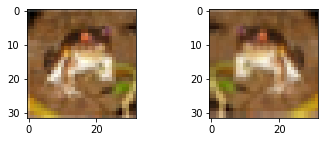

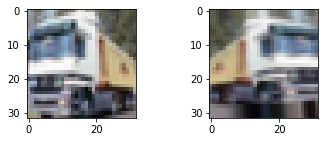

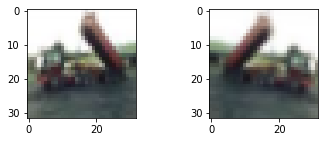

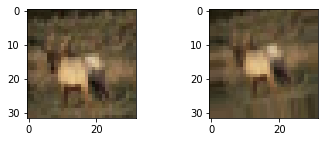

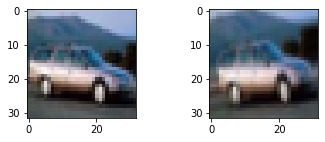

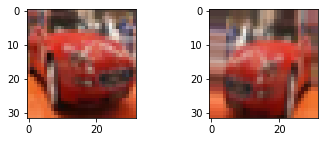

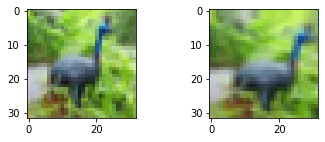

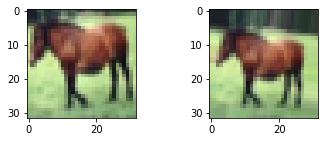

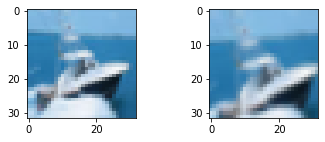

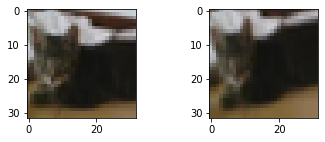

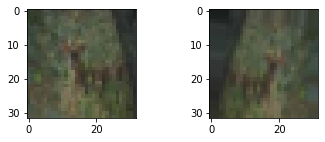

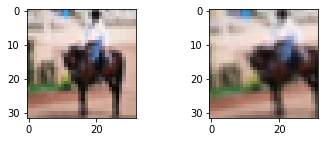

In [ ]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

**Remarks** 

* Each image from **`X_augmented_iterator`** is an ***augmented image*** of one image located in the original `X_train` image dataset
* This augmentation process is done once per epoch.
* During one epoch, the model will:
    1. *create the augmented version* of each picture from `X_train`, 
    2. for each image of `X_train`, *the model will randomly pick either the original version in `X_train` or its augmented version in `X_augmented_iterator`*
    3. and the model will be *fitted on the combination of some original images + some augmented images*

---



❓ **Question: what is the validation set when we have augmented images** ❓ 

* Previously, we used the `validation_split` argument to let the model separate the training set into a Train/Validation split when fitting the model for each epoch.
* It is not possible to use this kind of Train/Val Split here as **using an image in the training set and its transformation in the validation set is considered as a `data leakage`** !. 
* Therefore, we have to define the **`validation_data`** manually with the following commands:


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# The model
model_aug = initialize_model()
model_aug = compile_model(model_aug)

# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)

# The early stopping criterion
es = EarlyStopping(patience = 2)

# The fit
history_aug = model_aug.fit(train_flow, 
                        epochs = 30, 
                        callbacks = [es], 
                        validation_data = (X_val, y_val))


Epoch 1/30
625/625 [==============================] - 22s 33ms/step - loss: 1.9131 - accuracy: 0.2912 - val_loss: 1.6419 - val_accuracy: 0.4057
Epoch 2/30
625/625 [==============================] - 21s 33ms/step - loss: 1.6296 - accuracy: 0.4047 - val_loss: 1.4707 - val_accuracy: 0.4612
Epoch 3/30
625/625 [==============================] - 20s 31ms/step - loss: 1.5269 - accuracy: 0.4434 - val_loss: 1.3856 - val_accuracy: 0.5010
Epoch 4/30
625/625 [==============================] - 20s 32ms/step - loss: 1.4635 - accuracy: 0.4704 - val_loss: 1.2831 - val_accuracy: 0.5346
Epoch 5/30
625/625 [==============================] - 20s 32ms/step - loss: 1.4165 - accuracy: 0.4852 - val_loss: 1.2626 - val_accuracy: 0.5536
Epoch 6/30
625/625 [==============================] - 20s 31ms/step - loss: 1.3728 - accuracy: 0.5037 - val_loss: 1.2431 - val_accuracy: 0.5552
Epoch 7/30
625/625 [==============================] - 19s 31ms/step - loss: 1.3413 - accuracy: 0.5181 - val_loss: 1.1542 - val_accuracy:

❓ **Question: How did the model with an augmented dataset perform ?** ❓ 

Let's plot the previous and current run histories. What do you think of the data augmentation?

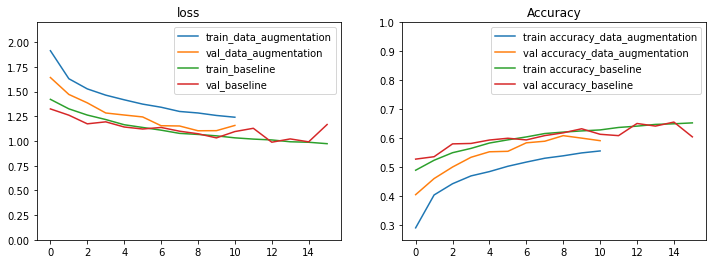

In [ ]:
axs = plot_history(history_aug, exp_name = 'data_augmentation')
plot_history(history ,axs = axs, exp_name='baseline')
plt.show()

In [ ]:
res_1 = model.evaluate(X_test, y_test, verbose = 0)

res_2 = model_aug.evaluate(X_test, y_test, verbose = 1)

print(f'Accuracy without data augmentation {res_1[1]*100:.2f}%')
print(f'Accuracy with data augmentation {res_2[1]*100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 1.1595 - accuracy: 0.5917
Accuracy without data augmentation 64.91%
Accuracy with data augmentation 59.17%


🥡 <b><u>Some takeaways from Data Augmentation:</u></b>

* Data augmentation may not improve your performance easily...

* Here it even decreased the performance!

* Its impact strongly depends on 
    * the model architecture you used
    * the learning rate, 
    * the type of augmentation chosen, etc...